# Question 6


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] 2866

[1] 348

[1] 2

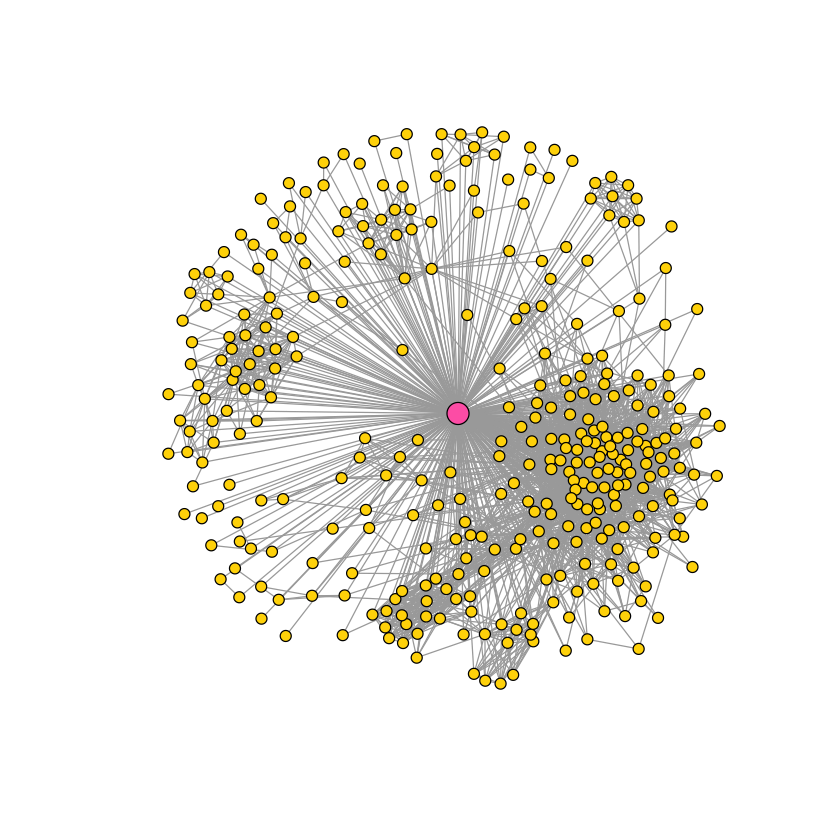

In [1]:
library("igraph")
# library("ggplot2")

# Create a personalized network of user with ID is 1
g <- read.graph("facebook_combined.txt", directed = FALSE)
sub_graph <- induced_subgraph(g, c(1, neighbors(g, 1)))
vertex_size <- rep(4, vcount(sub_graph))
vertex_size[1] <- 8
vertex_color <- rep("gold", vcount(sub_graph))
vertex_color[1] <- "hotpink"
plot.igraph(sub_graph, vertex.size = vertex_size, vertex.label = NA,
            vertex.color = vertex_color, edge.arrow.size = 0)
ecount(sub_graph)
vcount(sub_graph)
diameter(sub_graph)

# Question 8

# Question 9

# Question 10

# Question 12

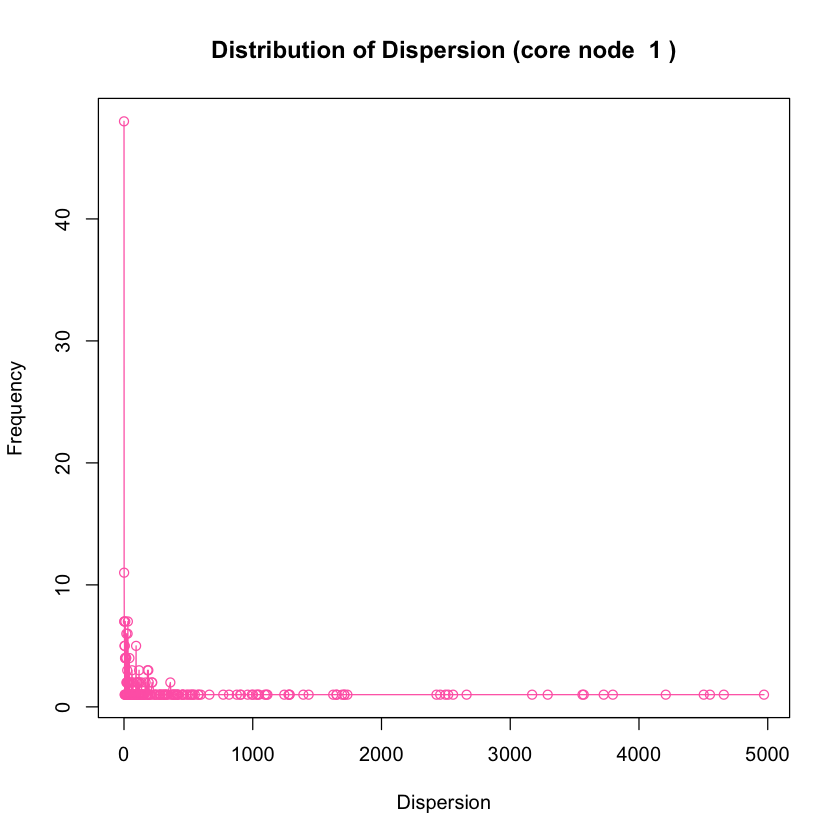

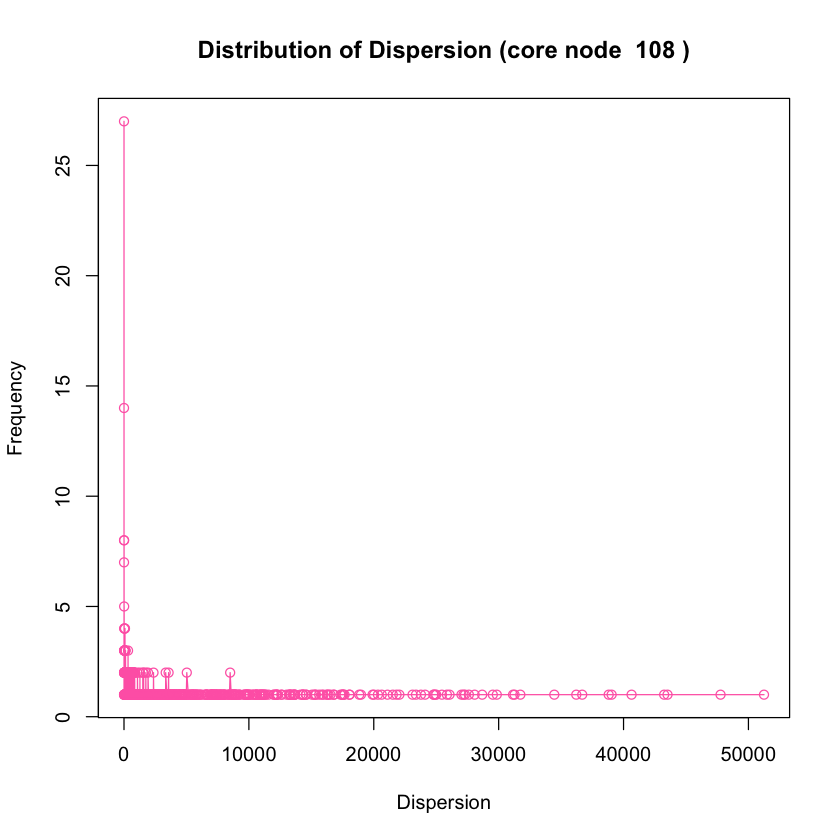

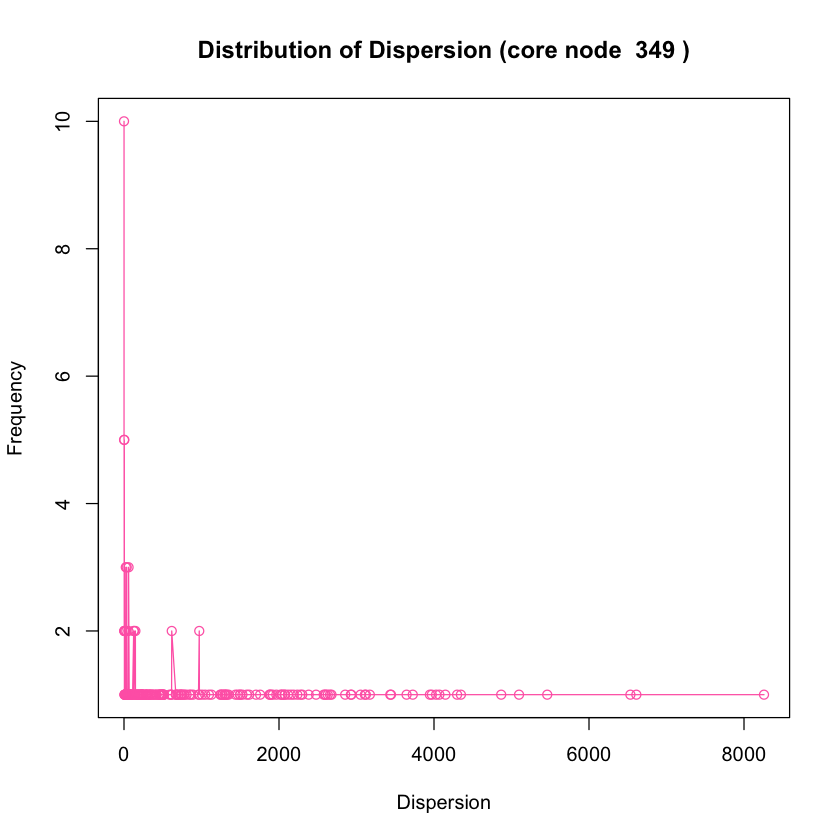

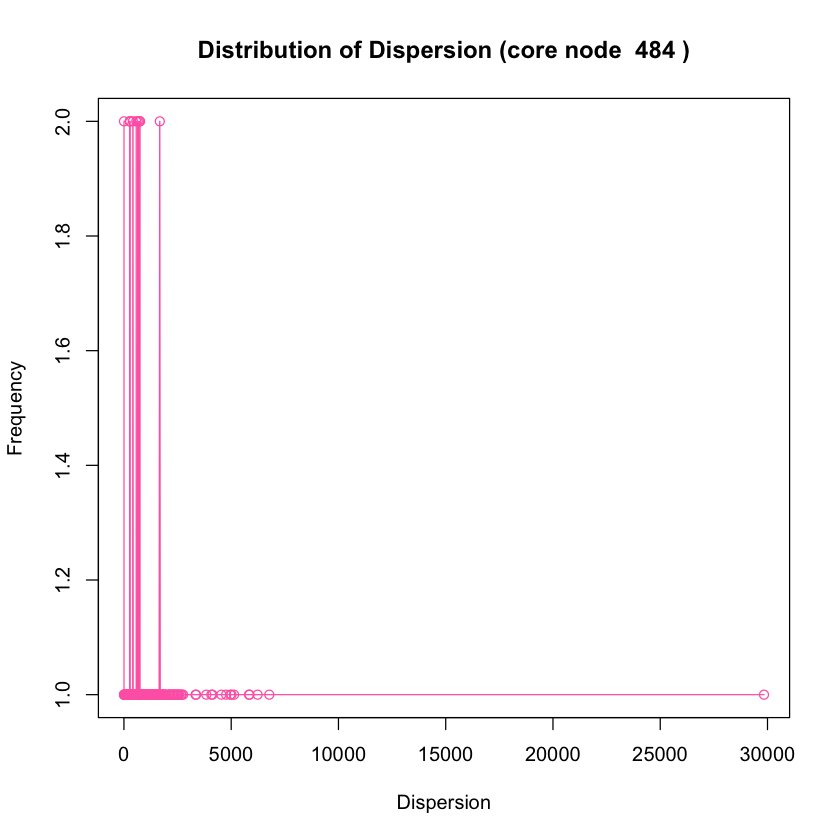

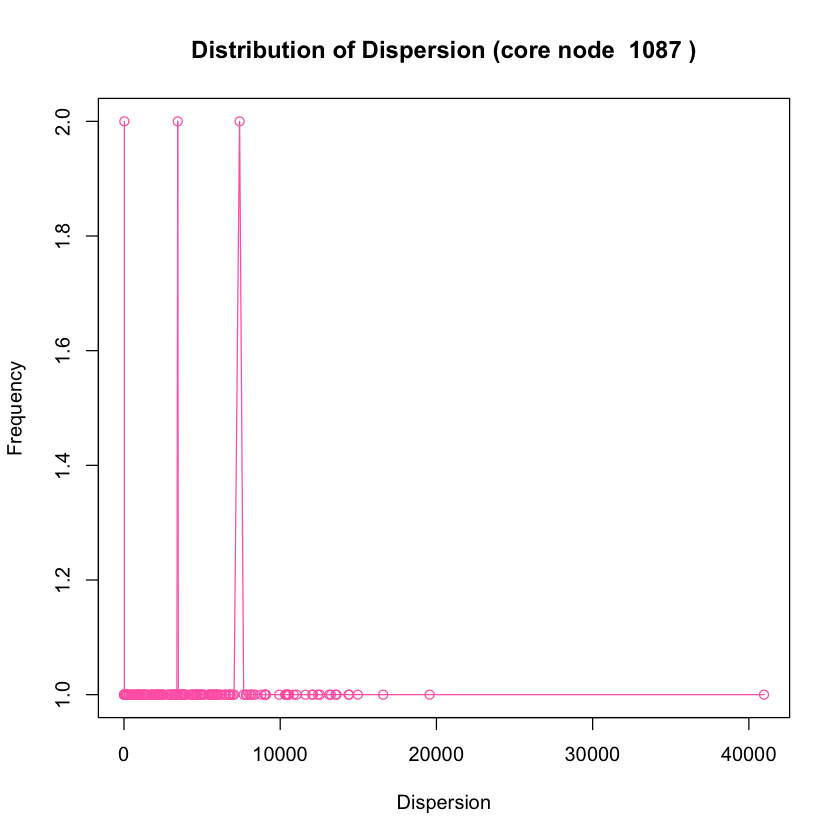

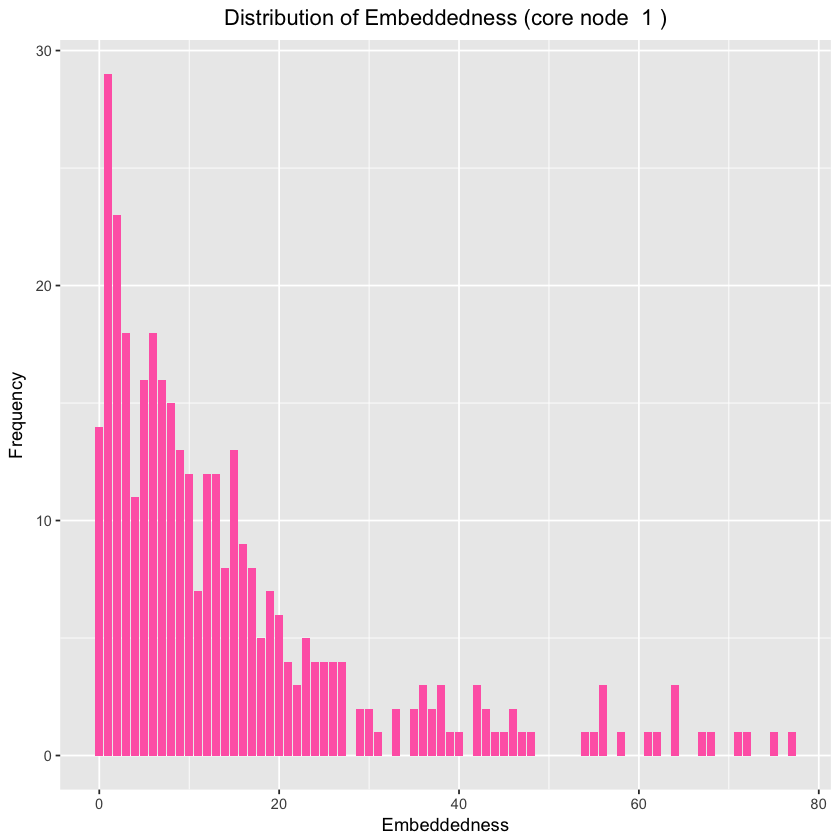

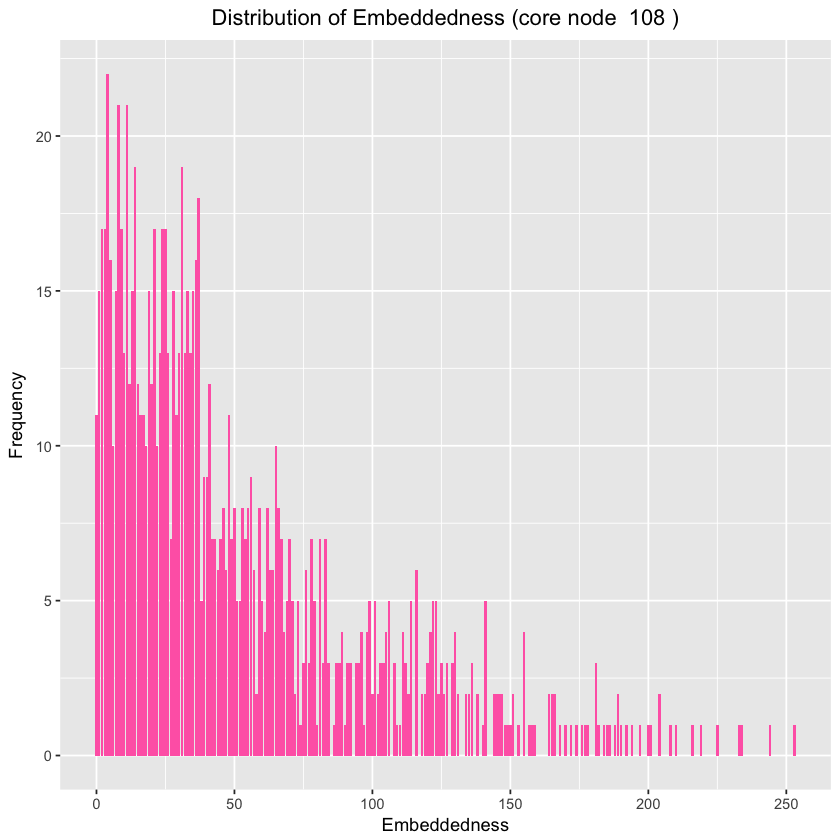

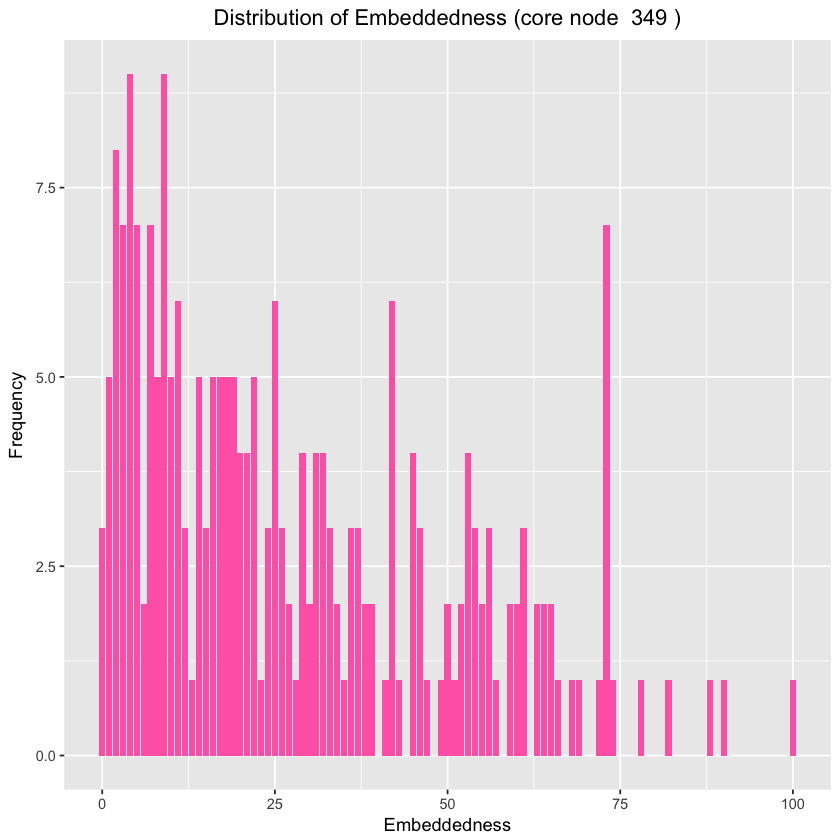

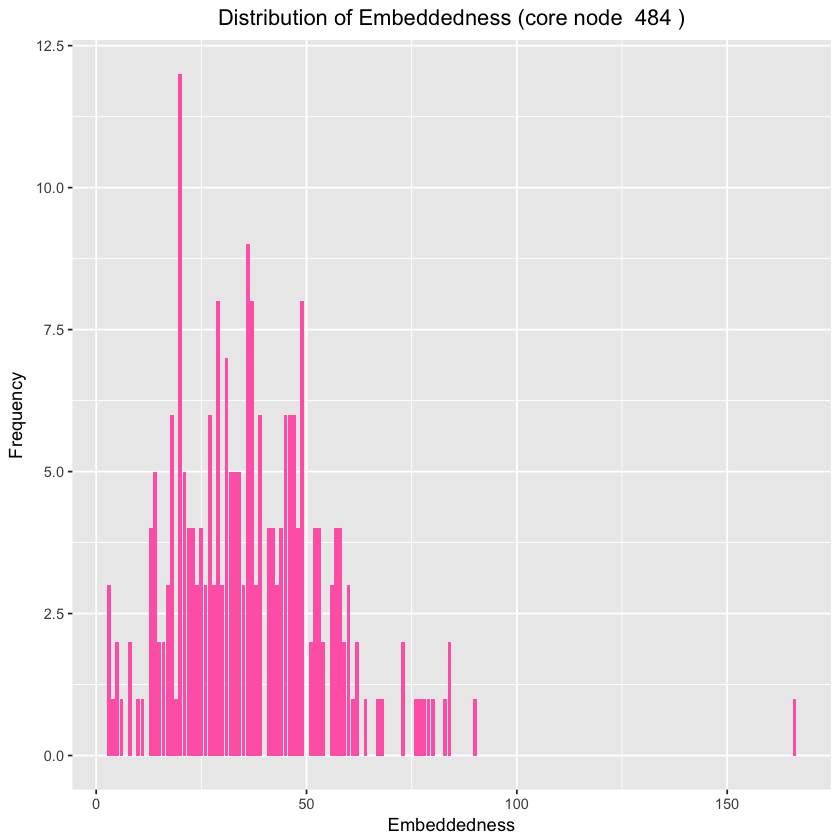

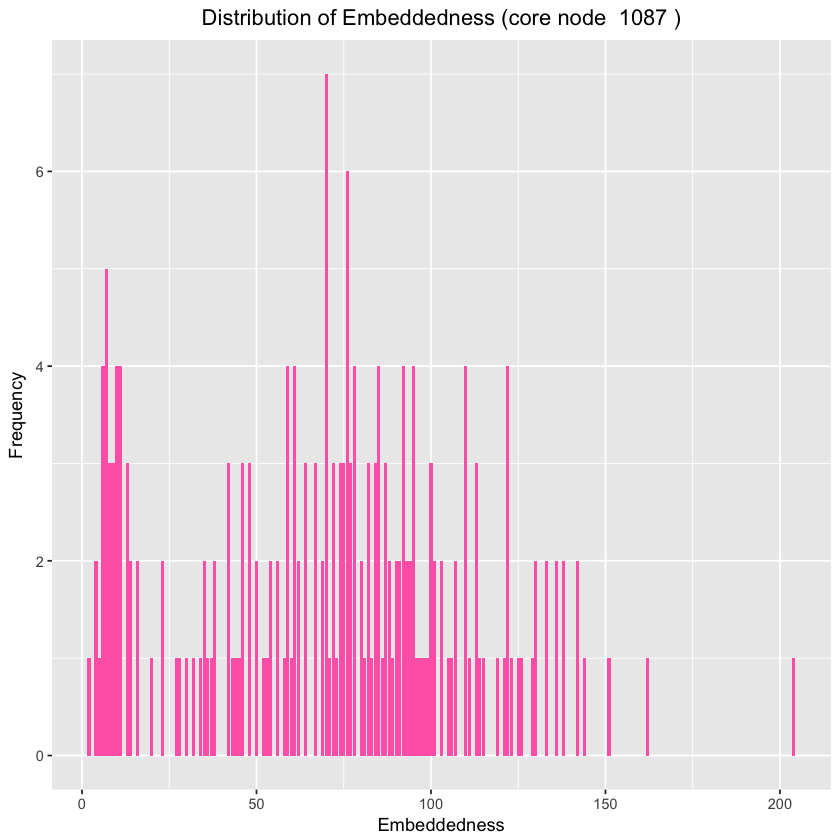

In [200]:
core_nodes = c(1, 108, 349, 484, 1087)
# core_nodes = c(349)

mutual_friends <- function(graph, target, core) {
    core_neighbors <- neighbors(graph, core)
    target_neighbors <- neighbors(graph, target)
    return(intersection(core_neighbors, target_neighbors))
}

embeddedness <- function(graph, target, core) {
    return(length(mutual_friends(graph, target, core)))
}

dispersion <- function(graph, target, core) {
    orig_label <- V(graph)$label
    target_label <- V(graph)[target]$label
    core_label <- V(graph)[core]$label
    labels <- c()
    for (label in orig_label) {
        if (label != target_label & label != core_label) {
            labels <- c(labels, label)
        }
    }
    
    delete_graph <- delete_vertices(graph, c(core, target))
    V(delete_graph)$label <- sort(labels)
    
    mutual_friend <- mutual_friends(graph, target, core) # id
    mutual_labels <- V(graph)[mutual_friend]$label
    vtoids <- c()
    for (id in V(delete_graph)) {
        for (label in mutual_labels) {
            if (V(delete_graph)[id]$label == label) {
                vtoids <- c(vtoids, id)
            }
        }
        
    }
    dist <- distances(delete_graph, v=vtoids, to=vtoids)
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
}

personalized_network <- function(core_node) {
    subgraph_nodes <- c(core_node, neighbors(g, core_node))
    personal_network <- induced_subgraph(g, c(core_node, neighbors(g, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

count_distribution <- function(arr, distr, core_node) {
    arr <- sort(arr)
    df <- data.frame(value=c(NA), freq=c(NA))
    df <- df[-1, ]
    curValue <- arr[1]
    count <- 1
    for (i in 2:length(arr)) {
        if (arr[i] != curValue) {
            df[nrow(df)+1, ] <- c(curValue, count)
            curValue <- arr[i]
            count <- 1
        } else {
            count <- count + 1
        }
    }
    df[nrow(df)+1, ] <- c(curValue, count)
    return(df)
}

plot_embed_distribution <- function(df, core_node) {
    ggplot(df, aes(x=value, y=freq))+ 
    geom_bar(stat = "identity", fill="hotpink")+
    labs(title=paste("Distribution of Embeddedness (core node ",core_node,")",collapse=""), x="Embeddedness", y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5))
}

plot_disp_distribution <- function(df, core_node) {
    plot(df, type="o", col="hotpink", main=paste("Distribution of Dispersion (core node ",core_node,")",collapse=""),
         xlab="Dispersion",ylab="Frequency")
}

embeds_list <- list()
for (core_node in core_nodes) {
    real_core <- core_node
    # create personalized network for current core node
    personal_network <- personalized_network(core_node)
    core_node <- which(V(personal_network)$label == core_node)
    # calculate embeddedness and dispersion values for each neighbor of the core node
    neighbors <- neighbors(personal_network, core_node, mode="total")
    embeds <- c()
    disps <- c()
    for (neighbor in neighbors) {
        cur_embed <- embeddedness(personal_network, neighbor, core_node)
        cur_disp <- dispersion(personal_network, neighbor, core_node)
        embeds <- c(embeds, cur_embed)
        disps <- c(disps, cur_disp)
    }
    # count frequency of each embeddedness and dispersion
    embeds_df <- count_distribution(embeds)
    disps_df <- count_distribution(disps)
    embeds_list[[length(embeds_list)+1]] <- embeds_df
    # plot dispersion distribution
    plot_disp_distribution(disps_df, real_core)
}

plot_embed_distribution(embeds_list[[1]], core_nodes[1])
plot_embed_distribution(embeds_list[[2]], core_nodes[2])
plot_embed_distribution(embeds_list[[3]], core_nodes[3])
plot_embed_distribution(embeds_list[[4]], core_nodes[4])
plot_embed_distribution(embeds_list[[5]], core_nodes[5])


# Question 13 & 14

Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 


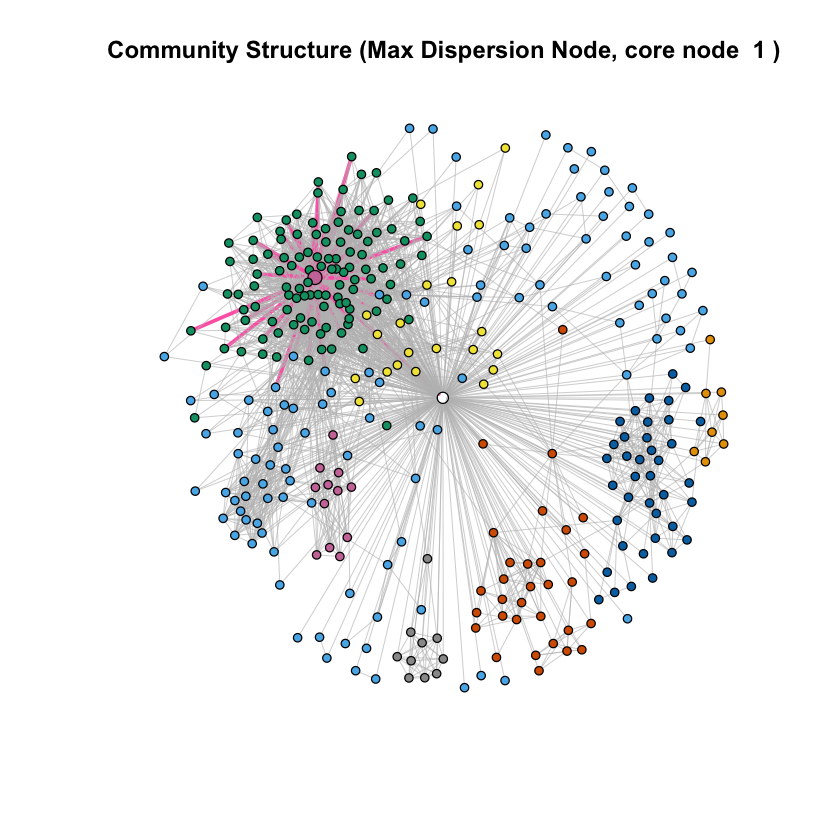

Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 


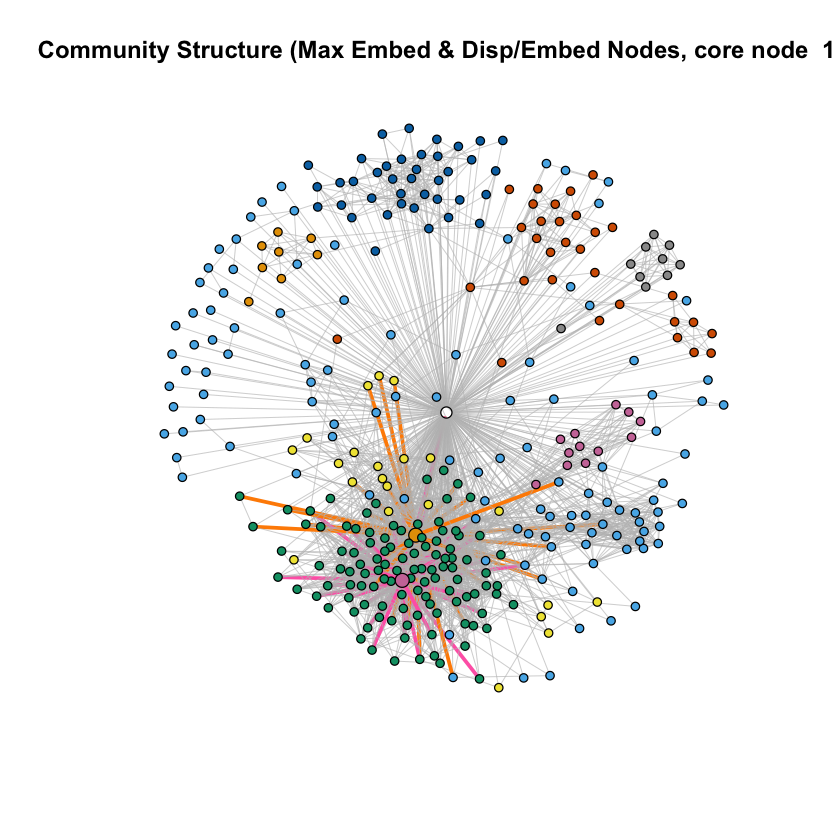

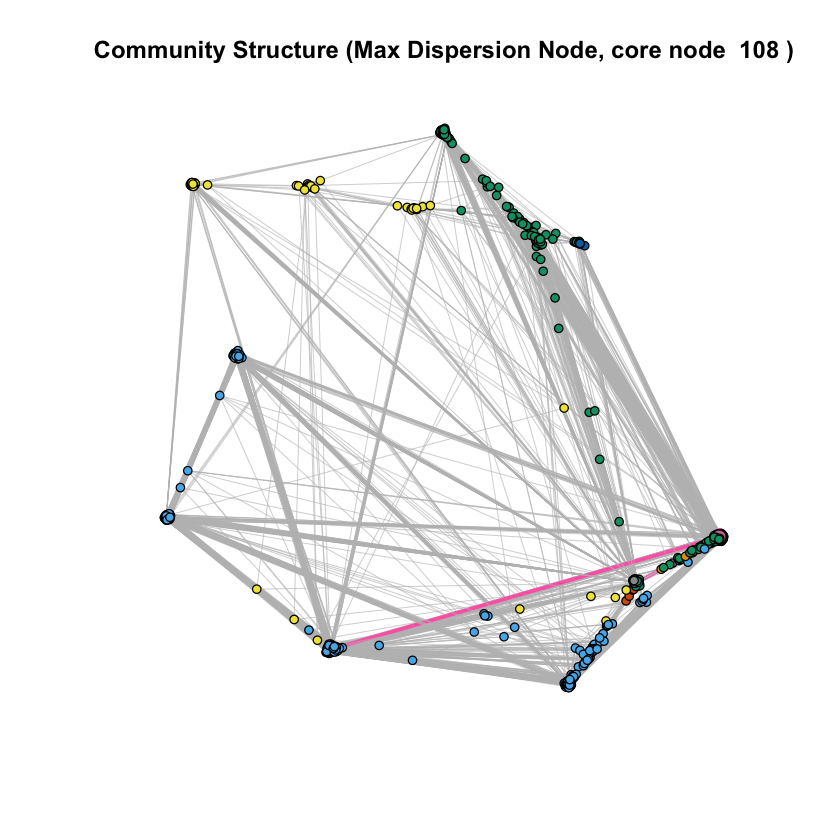

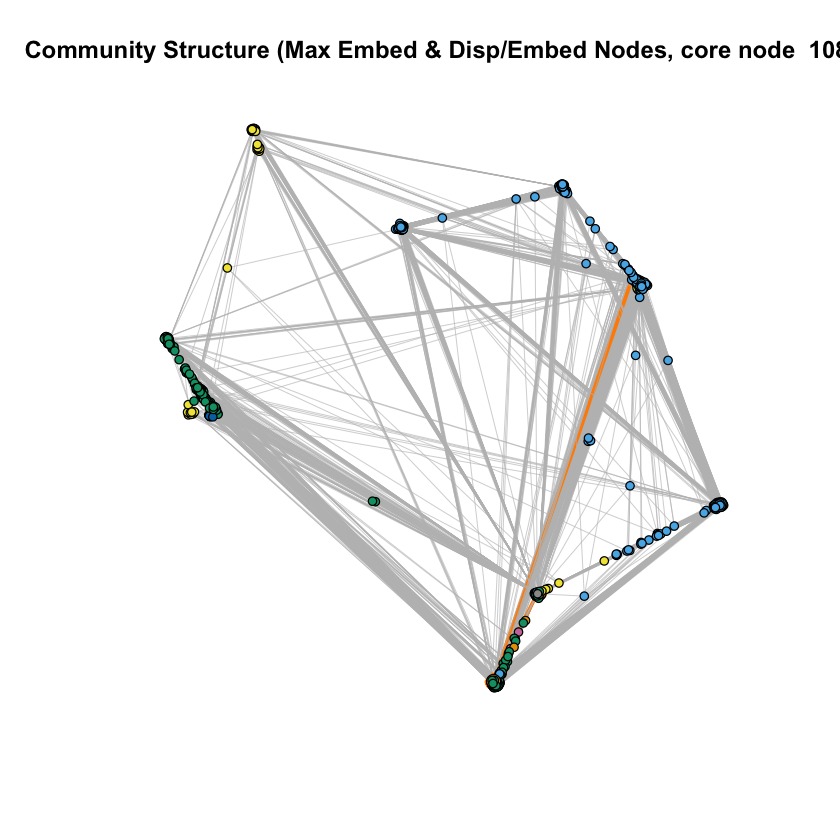

In [2]:
core_nodes = c(1, 108)

mutual_friends <- function(graph, target, core) {
    core_neighbors <- neighbors(graph, core)
    target_neighbors <- neighbors(graph, target)
    return(intersection(core_neighbors, target_neighbors))
}

embeddedness <- function(graph, target, core) {
    return(length(mutual_friends(graph, target, core)))
}

dispersion <- function(graph, target, core) {
    orig_label <- V(graph)$label
    target_label <- V(graph)[target]$label
    core_label <- V(graph)[core]$label
    labels <- c()
    for (label in orig_label) {
        if (label != target_label & label != core_label) {
            labels <- c(labels, label)
        }
    }
    
    delete_graph <- delete_vertices(graph, c(core, target))
    V(delete_graph)$label <- sort(labels)
    
    mutual_friend <- mutual_friends(graph, target, core) # id
    mutual_labels <- V(graph)[mutual_friend]$label
    vtoids <- c()
    for (id in V(delete_graph)) {
        for (label in mutual_labels) {
            if (V(delete_graph)[id]$label == label) {
                vtoids <- c(vtoids, id)
            }
        }
    }
    dist <- distances(delete_graph, v=vtoids, to=vtoids)
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
}

personalized_network <- function(core_node) {
    subgraph_nodes <- c(core_node, neighbors(g, core_node))
    personal_network <- induced_subgraph(g, c(core_node, neighbors(g, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

count_distribution <- function(arr, distr, core_node) {
    arr <- sort(arr)
    df <- data.frame(value=c(NA), freq=c(NA))
    df <- df[-1, ]
    curValue <- arr[1]
    count <- 1
    for (i in 2:length(arr)) {
        if (arr[i] != curValue) {
            df[nrow(df)+1, ] <- c(curValue, count)
            curValue <- arr[i]
            count <- 1
        } else {
            count <- count + 1
        }
    }
    df[nrow(df)+1, ] <- c(curValue, count)
    return(df)
}

for (core_node in core_nodes) {
    real_core <- core_node
    # create personalized network for current core node
    personal_network <- personalized_network(core_node)
    core_node <- which(V(personal_network)$label == core_node)
    neighbors <- neighbors(personal_network, core_node, mode="total")
    # calculate max dispersion node, max embeddedness node and max dispersion/embeddedness node
    max_disp_node <- NA
    max_disp_val <- 0
    max_embed_node <- NA
    max_embed_val <- 0
    max_disp_embed_node <- NA
    max_disp_embed_val <- 0
    for (neighbor in neighbors) {
        cur_embed <- embeddedness(personal_network, neighbor, core_node)
        cur_disp <- dispersion(personal_network, neighbor, core_node)
        if(cur_embed > max_embed_val) {
            max_embed_val <- cur_embed
            max_embed_node <- neighbor
        }
        if(cur_disp > max_disp_val) {
            max_disp_val <- cur_disp
            max_disp_node <- neighbor
        }
        if(cur_embed > 0) {
            disp_embed <- cur_disp/cur_embed
            if(disp_embed > max_disp_embed_val) {
                max_disp_embed_val <- disp_embed
                max_disp_embed_node <- neighbor
            }
        }
    }
    
    # detect community and highlight nodes
    personal_community = fastgreedy.community(personal_network)
    print(sizes(personal_community))
    # Q13: max dispersion node and edges
    node_color = personal_community$membership + 1
    node_size = rep(3,length(node_color))
    edge_color = rep("gray", length(E(personal_network)))
    edge_weight = rep(0.5, length(E(personal_network)))

    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_disp_node)] = "hotpink";
    edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_node |  
                      get.edgelist(personal_network, name = FALSE)[,2] == max_disp_node)] = 3;

    node_size[max_disp_node] = 5
    node_color[max_disp_node] = 7
    node_size[core_node] = 4
    node_color[core_node] = 0
    plot.igraph(personal_network, vertex.size = node_size, vertex.label = NA, 
                edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, 
               main = paste("Community Structure (Max Dispersion Node, core node ",real_core,")", collapse=""))
    
    # Q14: max embeddedness node and max dispersion/embeddedness node
    node_color2 = personal_community$membership + 1
    node_size2 = rep(3,length(node_color))
    edge_color2 = rep("gray", length(E(personal_network)))
    edge_weight2 = rep(0.5, length(E(personal_network)))

    edge_color2[which(get.edgelist(personal_network, name = FALSE)[,1] == max_embed_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_embed_node)] = "hotpink";
    edge_weight2[which(get.edgelist(personal_network, name = FALSE)[,1] == max_embed_node |  
                      get.edgelist(personal_network, name = FALSE)[,2] == max_embed_node)] = 3;
    edge_color2[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_embed_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_disp_embed_node)] = "darkorange";
    edge_weight2[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_embed_node |  
                      get.edgelist(personal_network, name = FALSE)[,2] == max_disp_embed_node)] = 3;

    node_size2[max_embed_node] = 5
    node_color2[max_embed_node] = 7
    node_size2[max_disp_embed_node] = 5
    node_color2[max_disp_embed_node] = 9
    node_size2[core_node] = 4
    node_color2[core_node] = 0
    plot.igraph(personal_network, vertex.size = node_size2, vertex.label = NA, 
                edge.width = edge_weight2, edge.color = edge_color2, vertex.color = node_color2, 
               main = paste("Community Structure (Max Embed & Disp/Embed Nodes, core node ",real_core,")", collapse=""))
}
